In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
df=pd.read_csv("fcc-forum-pageviews.csv")

In [3]:
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [4]:
df=df.drop(df[(df["value"]<df["value"].quantile(0.025)) | (df["value"]>df["value"].quantile(0.975))].index)

In [5]:
df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


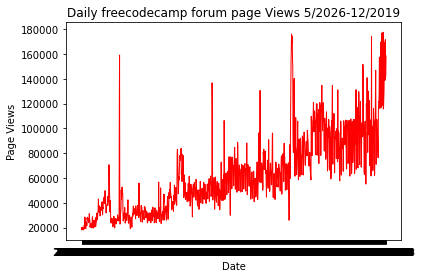

In [6]:
plt.title("Daily freecodecamp forum page Views 5/2026-12/2019")
plt.plot(df["date"],df["value"],color="red",linewidth=1)
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.show()

NameError: name 'title' is not defined

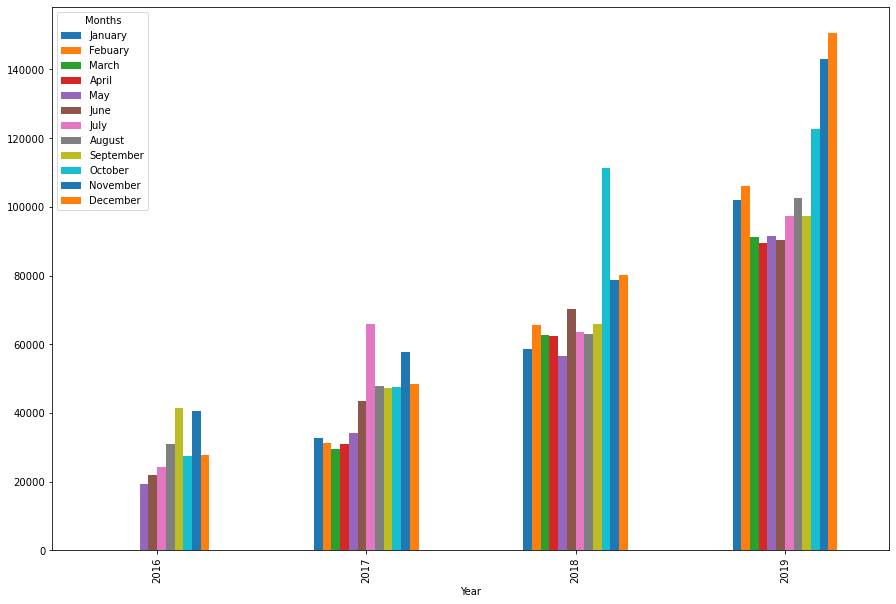

In [7]:
df_bar = df.copy()
df_bar["Year"]=pd.DatetimeIndex(df_bar.date).year
df_bar["Month"]=pd.DatetimeIndex(df_bar.date).month
df_bar=df_bar.groupby(["Year","Month"])["value"].mean()#average daily pageview
df_bar=df_bar.unstack()

month_names=["January","Febuary","March","April","May","June","July","August","September","October","November","December"]

fig = df_bar.plot(kind= 'bar', figsize = (15,10)).figure
l=plt.legend(title="Months",fontsize=10,labels=month_names)
l.get_title()
title.set_fontsize(15)
plt.xlabel("Years")
plt.ylabel("Average Page Views")


In [ ]:
#box plot
df_box=df.copy()
df_box.reset_index(inplace=True)
df_box["Year"]=pd.DatetimeIndex(df_box.date).year
df_box["Month"]=pd.DatetimeIndex(df_box.date).month
sns.boxplot(x="Year",y="value",data=df_box)
plt.title("Year-wisse Box Plot (Trend)")
plt.ylabel("Average Page Views")
plt.xlabel("Years")
plt.show()

In [ ]:
#box plot
df_box=df.copy()
df_box.reset_index(inplace=True)
df_box["Year"]=pd.DatetimeIndex(df_box.date).year
df_box["Month"]=pd.DatetimeIndex(df_box.date).month
month_names=["January","Febuary","March","April","May","June","July","August","September","October","November","December"]

sns.boxplot(x="Month",y="value",data=df_box)

plt.title("Year-wisse Box Plot (Trend)")
plt.ylabel("Average Page Views")
plt.xlabel("Months")
plt.show()